In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import preprocess 

# HSV

(224, 224, 3)


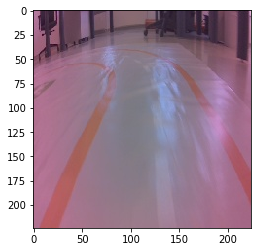

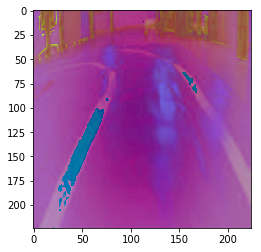

1 0.9772799744897959
2 1.0
keep mask 1
0.9772799744897959


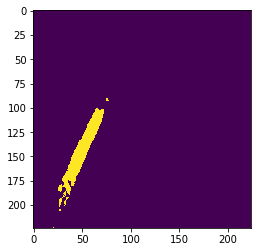

'\n#red\nlower1 = np.array([170, 100,100])\nupper1 = np.array([180, 255, 255])\n\nlower2 = np.array([0,100,100])\nupper2 = np.array([5,255,255])\n\nmask1 = cv2.inRange(hsv, lower1, upper1)\nmask2 =cv2.inRange(hsv, lower2, upper2)\nmask_first=mask1+mask2\nmask_first[0:90,0:224]=0\npercentage1=np.sum(mask_first==0)/(224*224)\nprint("1",percentage1)\n\nif percentage1>0.95 or percentage1<0.89:\n    lower1 = np.array([170, 100,0])\n    upper1 = np.array([180, 255,120 ])\n\n    lower2 = np.array([0,100,0])\n    upper2 = np.array([5,255,120])\n\n    mask1 = cv2.inRange(hsv, lower1, upper1)\n    mask2 =cv2.inRange(hsv, lower2, upper2)\n    mask_second=mask1+mask2\n    mask_second[0:90,0:224]=0\n    percentage2= np.sum(mask_second==0)/(224*224)\n    print("2",percentage2)\n\n    if (percentage2>0.95 or percentage2<0.89) & (percentage1 < percentage2) :\n        mask=mask_first\n        print("keep mask 1")\n    else:\n        mask=mask_second\n        print("keep mask 2")\nelse : \n    mask = ma

In [3]:
img = cv2.imread('road_following_testautomatic3/apex/69_125_f1578702-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
print(img.shape)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

#orange

lower = np.array([0, 50,100])
upper = np.array([60,255, 255])
mask_first = cv2.inRange(hsv, lower, upper)
mask_first[0:90,0:224]=0
percentage1= np.sum(mask_first==0)/(224*224)
print("1",percentage1)

if percentage1>0.95 or percentage1<0.89:
    lower = np.array([0, 50,0])
    upper = np.array([60,255, 120])
    mask_second = cv2.inRange(hsv, lower, upper)
    mask_second[0:90,0:224]=0
    percentage2= np.sum(mask_second==0)/(224*224)
    print("2",percentage2)

    if (percentage2>0.95 or percentage2<0.89) and percentage1 < percentage2 :
        mask=mask_first
        print("keep mask 1")
        
    else:
        mask=mask_second
        print("else")
        
else: 
    mask = mask_first


plt.imshow(mask)
print(np.sum(mask==0)/(224*224))
plt.show()

"""
#red
lower1 = np.array([170, 100,100])
upper1 = np.array([180, 255, 255])

lower2 = np.array([0,100,100])
upper2 = np.array([5,255,255])

mask1 = cv2.inRange(hsv, lower1, upper1)
mask2 =cv2.inRange(hsv, lower2, upper2)
mask_first=mask1+mask2
mask_first[0:90,0:224]=0
percentage1=np.sum(mask_first==0)/(224*224)
print("1",percentage1)

if percentage1>0.95 or percentage1<0.89:
    lower1 = np.array([170, 100,0])
    upper1 = np.array([180, 255,120 ])

    lower2 = np.array([0,100,0])
    upper2 = np.array([5,255,120])

    mask1 = cv2.inRange(hsv, lower1, upper1)
    mask2 =cv2.inRange(hsv, lower2, upper2)
    mask_second=mask1+mask2
    mask_second[0:90,0:224]=0
    percentage2= np.sum(mask_second==0)/(224*224)
    print("2",percentage2)

    if (percentage2>0.95 or percentage2<0.89) & (percentage1 < percentage2) :
        mask=mask_first
        print("keep mask 1")
    else:
        mask=mask_second
        print("keep mask 2")
else : 
    mask = mask_first

plt.imshow(mask_first)
plt.show()
plt.imshow(mask)
plt.show()


histg = np.sum(mask[mask.shape[0]//2:,:],axis=0)    
plt.plot(histg)
plt.show()
xmax=np.argmax(histg)
print(xmax)

mblur=cv2.medianBlur(mask,5)
plt.imshow(mblur)
plt.show()



blur=cv2.GaussianBlur(mask, (15,15), 0)
canny= cv2.Canny(blur,50,150)
plt.imshow(canny)
plt.show()

line_image=np.copy(mask)*0

lines=cv2.HoughLinesP(canny, rho=4, theta=np.pi/180, threshold=20, minLineLength=8, maxLineGap=4)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
    
lines_edges = cv2.addWeighted(mask, 0.8, line_image, 1, 0)
plt.imshow(line_image)
plt.show()
plt.imshow(lines_edges)
plt.show()

###############################


print(mask[91:224,0:138])

mask[:,0:(xmax-50)]=0
mask[:,(xmax+50):]=0
plt.imshow(mask)
plt.show()

###############################
"""

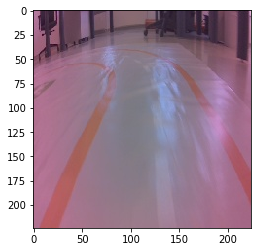

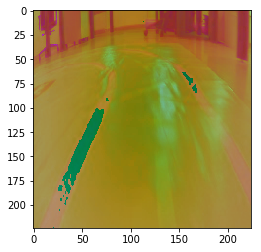

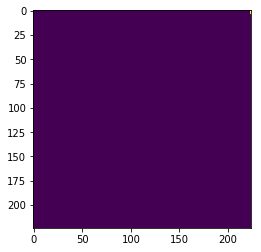

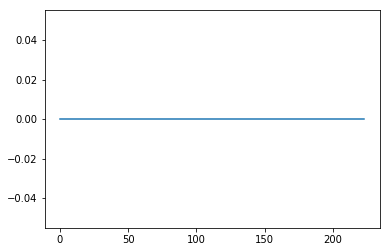

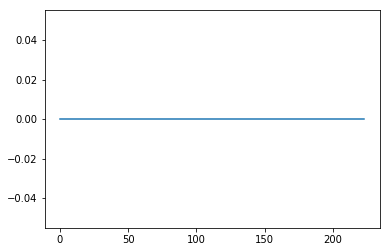

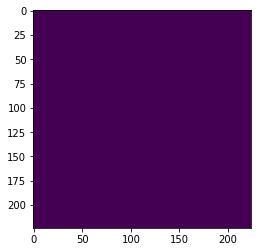

In [2]:
img = cv2.imread('road_following_testautomatic/apex/58_126_1c7a3c98-c90b-11eb-ba6b-a0a4c55ef385.jpg',1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

#orange
#lower = np.array([0, 50,100])
#upper = np.array([60,255, 255])

#red
lower = np.array([160, 100,0])
upper = np.array([180, 255, 255])

mask = cv2.inRange(hsv, lower, upper)
plt.imshow(mask)
plt.show()


###############################
histg = np.sum(mask[mask.shape[0]//2:,:],axis=0)
plt.plot(histg)
plt.show()
xmax_startline=np.argmax(histg)
windows=np.sum(mask[xmax_startline-30:xmax_startline+30,:],axis=0)
plt.plot(windows)
plt.show()
###############################
mask[0:90,0:224]=0
plt.imshow(mask)
plt.show()



# HLS

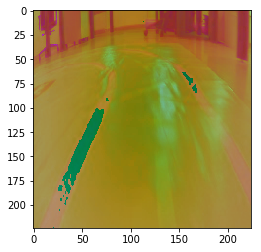

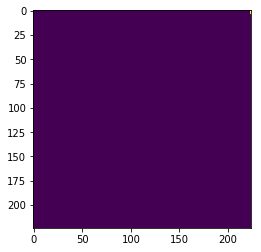

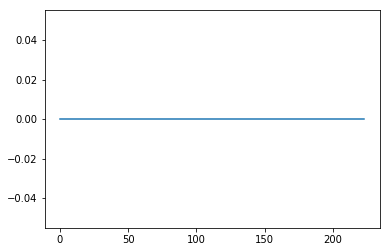

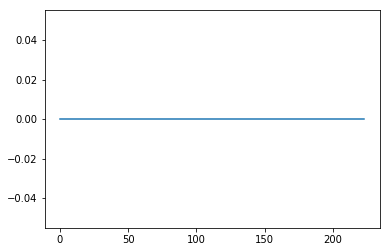

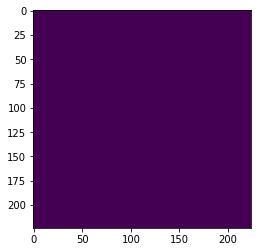

In [6]:
imghls = cv2.imread('road_following_testautomatic3/apex/69_125_f1578702-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
#imghls=cv2.cvtColor(imghls, cv2.COLOR_BGR2RGB)
#plt.imshow(imghls)
#plt.show()
hls = cv2.cvtColor(imghls, cv2.COLOR_BGR2HLS)
plt.imshow(hls)
plt.show()

#orange
lowerhls = np.uint8([  0, 200,   0])
upperhls = np.uint8([255, 255, 255])

#red
#lower = np.array([160, 100,0])
#upper = np.array([180, 255, 255])

maskhls = cv2.inRange(hls, lowerhls, upperhls)
plt.imshow(maskhls)
plt.show()


###############################
histghls = np.sum(maskhls[maskhls.shape[0]//2:,:],axis=0)
plt.plot(histghls)
plt.show()
xmax_startlinehls=np.argmax(histghls)
windowshls=np.sum(maskhls[xmax_startlinehls-30:xmax_startlinehls+30,:],axis=0)
plt.plot(windowshls)
plt.show()
###############################
maskhls[0:90,0:224]=0
plt.imshow(maskhls)
plt.show()

# Preview ColorIsolation

In [ ]:
from jetcam.csi_camera import CSICamera
# from jetcam.usb_camera import USBCamera
camera = CSICamera(width=224, height=224)
# camera = USBCamera(width=224, height=224)
camera.running = True

In [ ]:
import ipywidgets
from IPython.display import display
import traitlets
from jetcam.utils import bgr8_to_jpeg
from color_isolation import colorIsolationPreprocess
from utils import preprocess
from matplotlib import pyplot as plt
import PIL.Image
import torchvision


image_widget= ipywidgets.Image(format='jpeg', width=camera.width, height=camera.height)
colorIsolation_widget = ipywidgets.Image(format='jpeg', width=camera.width, height=camera.height)
#preprocess_widget = ipywidgets.Image(format='jpeg', width=camera.width, height=camera.height)
image=camera.value.copy()
image_colorIsolation=colorIsolationPreprocess(image,'red')
imagePreprocess=preprocess(image)
colorIsolation_widget.value=bgr8_to_jpeg(image_colorIsolation)
image_widget.value=bgr8_to_jpeg(image)


display(image_widget,colorIsolation_widget)


# APPLY PROCESS TO FOLDER 

In [ ]:
data_dir='road_following_r_line'
dir_target='road_following_colorIsolation'
import cv2
import numpy as np
import os 
from color_isolation import colorIsolationTransform

os.chdir("/home/jetson/jetracer/notebooks")
num=1000


if not os.path.exists(dir_target) :
    os.mkdir(dir_target)
    os.mkdir(dir_target+"/apex")
    while not os.path.exists(dir_target):
        pass
    print(dir_target," create")
else :
    print(dir_target," already exists")
    
liste_cate = os.listdir(data_dir+'/apex')
    

for a in range(0,len(liste_cate)): 
    path=data_dir+'/apex/'+liste_cate[a]
    items=[]
    if path.endswith(".jpg"):
        items = path.split('_')
        itemss=items[3].split('/')
        img,temps=colorIsolationTransform(path,'red')
        cv2.imwrite(dir_target+'/apex/'+str(itemss[2])+'_'+str(items[4])+'_ColorIsolation'+str(num)+'.jpg', img)
        num+=1
        print(temps)

print("image processed and copy in ", dir_target+"/apex")

    
    


In [ ]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
#os.chdir('road_following_test_TRAIN')


# Filter black image

In [ ]:
nbpixelsnoir=0
totpixel=224*224
imgnb = cv2.imread('road_following_colorIsolation/apex/41_162_ColorIsolation202.jpg',-1)
nbpixelnoir=np.sum(imgnb==0)
percentage=nbpixelnoir/totpixel
print("%black pixels:",percentage)


In [ ]:
import os 
import cv2
import numpy as np
data_dir='road_following_colorIsolation'
nbrm=0

liste_cate = os.listdir(data_dir+'/apex')
listerem=[]
listeper=[]


for a in range(0,len(liste_cate)): 
    path=data_dir+'/apex/'+liste_cate[a]
    if path.endswith(".jpg"):
        nbpixelnoir=0
        imgnb = cv2.imread(path,-1)
        percentage=np.sum(imgnb==0)/(224*224)
        if percentage > 0.9:
            #os.remove(path)
            print(percentage)
            listeper.append(percentage)
            print(path," removed")
            listerem.append(path)
            nbrm+=1
        #elif 0.95>percentage>0.93:
            #print(path)

print(nbrm)




In [ ]:
for i in range(0,len(listerem)):
    img = cv2.imread(str(listerem[i]),1)
    plt.title(str(listeper[i]))
    plt.imshow(img)
    plt.show()
    

In [ ]:
print(listerem[0])

In [23]:
X=np.arctan2(0.55,0.024) * 0.94 + (np.arctan2(0.55,0.024) - np.arctan2(0.40,0.08)) * 0.2 -0.50
print(X,"rad")
X=X*180/np.pi
print(X,"degres")

0.9663137425625559 rad
55.365699134325595 degres


In [16]:
(0.5 - 0.45) / 2.0

0.024999999999999994

In [ ]:
X=